## Import Library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## dataset dan dataloader

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
bs = 64
# crop_size = "" # tidak menggunakan crop_size dikarenakan ukuran dari image nya telah sama

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

## Arsitektur dan config

In [5]:
from jcopdl.layers import linear_block

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm=True),
            linear_block(512, 256, batch_norm=True),
            linear_block(256, z_size, activation='sigmoid') # tanh(-1 -> 1), sigmoid(0 -> 1), softmax(antara 0 dan 1)
        )
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm=True),
            linear_block(256, 512, batch_norm=True),
            linear_block(512, 784, activation='sigmoid') # tanh(-1 -> 1), sigmoid(0 -> 1), softmax(antara 0 dan 1)
        )
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [7]:
config = set_config({
    "z_size": 32,
    "batch_size": bs 
})

## Training Preparation ~> MCOC

In [8]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/ae") # ae = auto encoder

## Training

### Feature nya adalah target 

In [9]:
# training loop
# menggunakan snippets sesuai dengan studi kasus. yaitu dikasus ini tidak menggunakan accuracy

from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device) # melakukan flattening pada feature
        
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3348 | Test_cost  = 0.2563 | 




Epoch     2
Train_cost  = 0.1824 | Test_cost  = 0.1729 | 




Epoch     3
Train_cost  = 0.1586 | Test_cost  = 0.1514 | 




Epoch     4
Train_cost  = 0.1448 | Test_cost  = 0.1415 | 




Epoch     5
Train_cost  = 0.1356 | Test_cost  = 0.1341 | 




Epoch     6
Train_cost  = 0.1284 | Test_cost  = 0.1285 | 




Epoch     7
Train_cost  = 0.1225 | Test_cost  = 0.1237 | 




Epoch     8
Train_cost  = 0.1175 | Test_cost  = 0.1200 | 




Epoch     9
Train_cost  = 0.1140 | Test_cost  = 0.1179 | 




Epoch    10
Train_cost  = 0.1103 | Test_cost  = 0.1155 | 




Epoch    11
Train_cost  = 0.1081 | Test_cost  = 0.1131 | 




Epoch    12
Train_cost  = 0.1051 | Test_cost  = 0.1111 | 




Epoch    13
Train_cost  = 0.1032 | Test_cost  = 0.1096 | 




Epoch    14
Train_cost  = 0.1009 | Test_cost  = 0.1082 | 




Epoch    15
Train_cost  = 0.0984 | Test_cost  = 0.1070 | 




Epoch    16
Train_cost  = 0.0977 | Test_cost  = 0.1063 | 




Epoch    17
Train_cost  = 0.0967 | Test_cost  = 0.1059 | 




Epoch    18
Train_cost  = 0.0948 | Test_cost  = 0.1052 | 




Epoch    19
Train_cost  = 0.0942 | Test_cost  = 0.1042 | 




Epoch    20
Train_cost  = 0.0929 | Test_cost  = 0.1038 | 


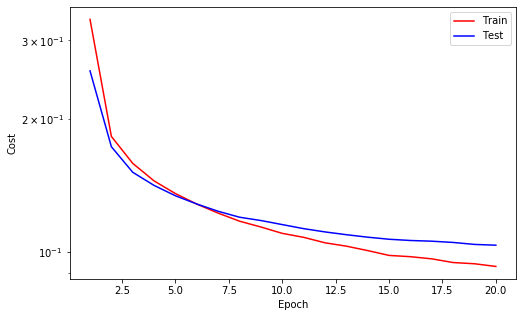



Epoch    21
Train_cost  = 0.0919 | Test_cost  = 0.1036 | 




Epoch    22
Train_cost  = 0.0908 | Test_cost  = 0.1025 | 




Epoch    23
Train_cost  = 0.0898 | Test_cost  = 0.1021 | 




Epoch    24
Train_cost  = 0.0896 | Test_cost  = 0.1017 | 




Epoch    25
Train_cost  = 0.0881 | Test_cost  = 0.1009 | 




Epoch    26
Train_cost  = 0.0870 | Test_cost  = 0.1004 | 




Epoch    27
Train_cost  = 0.0866 | Test_cost  = 0.1007 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1004




Epoch    28
Train_cost  = 0.0857 | Test_cost  = 0.1001 | 




Epoch    29
Train_cost  = 0.0855 | Test_cost  = 0.1001 | 




Epoch    30
Train_cost  = 0.0847 | Test_cost  = 0.0995 | 




Epoch    31
Train_cost  = 0.0841 | Test_cost  = 0.0996 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0995




Epoch    32
Train_cost  = 0.0833 | Test_cost  = 0.0993 | 




Epoch    33
Train_cost  = 0.0831 | Test_cost  = 0.0992 | 




Epoch    34
Train_cost  = 0.0836 | Test_cost  = 0.0993 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0992




Epoch    35
Train_cost  = 0.0829 | Test_cost  = 0.0999 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0992




Epoch    36
Train_cost  = 0.0830 | Test_cost  = 0.0993 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0992




Epoch    37
Train_cost  = 0.0822 | Test_cost  = 0.0987 | 




Epoch    38
Train_cost  = 0.0814 | Test_cost  = 0.0988 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0987




Epoch    39
Train_cost  = 0.0814 | Test_cost  = 0.0984 | 




Epoch    40
Train_cost  = 0.0805 | Test_cost  = 0.0988 | 


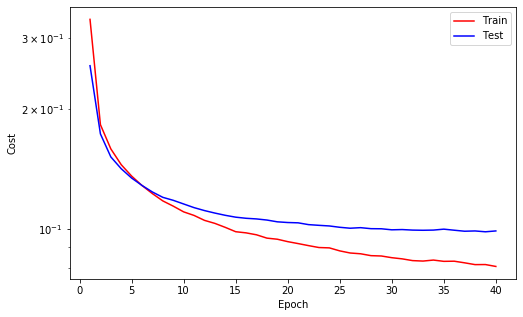

==> EarlyStop patience =  1 | Best test_cost: 0.0984




Epoch    41
Train_cost  = 0.0807 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0984




Epoch    42
Train_cost  = 0.0800 | Test_cost  = 0.0979 | 




Epoch    43
Train_cost  = 0.0798 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0979




Epoch    44
Train_cost  = 0.0794 | Test_cost  = 0.0986 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0979




Epoch    45
Train_cost  = 0.0796 | Test_cost  = 0.0978 | 




Epoch    46
Train_cost  = 0.0790 | Test_cost  = 0.0982 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0978




Epoch    47
Train_cost  = 0.0786 | Test_cost  = 0.0983 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0978




Epoch    48
Train_cost  = 0.0784 | Test_cost  = 0.0985 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0978




Epoch    49
Train_cost  = 0.0780 | Test_cost  = 0.0976 | 




Epoch    50
Train_cost  = 0.0790 | Test_cost  = 0.0979 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0976




Epoch    51
Train_cost  = 0.0781 | Test_cost  = 0.0977 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0976




Epoch    52
Train_cost  = 0.0775 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0976




Epoch    53
Train_cost  = 0.0774 | Test_cost  = 0.0982 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0976




Epoch    54
Train_cost  = 0.0774 | Test_cost  = 0.0975 | 




Epoch    55
Train_cost  = 0.0774 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0975




Epoch    56
Train_cost  = 0.0768 | Test_cost  = 0.0979 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0975




Epoch    57
Train_cost  = 0.0763 | Test_cost  = 0.0976 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0975




Epoch    58
Train_cost  = 0.0767 | Test_cost  = 0.0978 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0975




Epoch    59
Train_cost  = 0.0767 | Test_cost  = 0.0988 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0975
==> Execute Early Stopping at epoch: 59 | Best test_cost: 0.0975
==> Best model is saved at model/ae


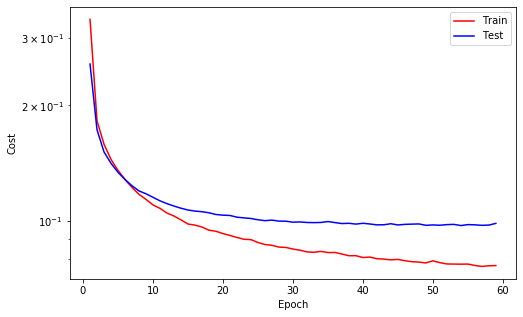

In [10]:
# training 

while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Evaluate / Visualize

In [11]:
feature, target = next(iter(testloader))
feature = feature.view(-1, 784).to(device)

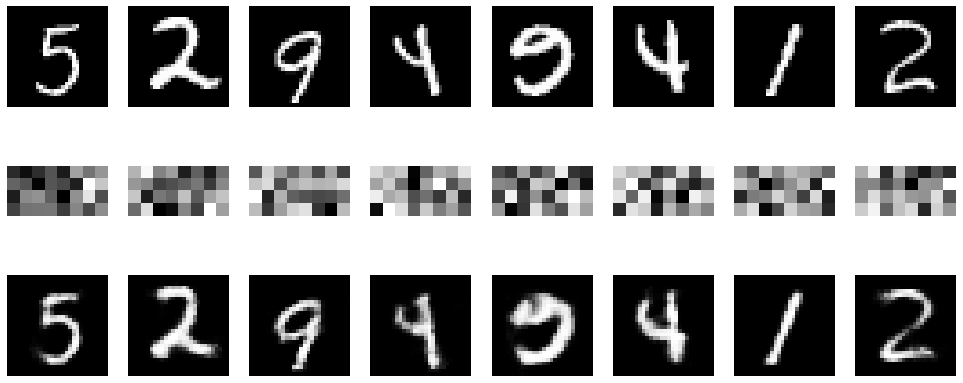

In [14]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature) # encode akan menghasilkan sebuah latent space yang isi bisa berupa angka
    dec = model.decode(enc) # decode di sini akan menghasilkan sebuah gambar yang mirip dengan feature semulanya
    
fig, ax = plt.subplots(3, 8, figsize=(17,7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28,28).cpu(), cmap="gray")
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4,8).cpu(), cmap="gray")
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28,28).cpu(), cmap="gray")
    ax[2, i].axis('off')

## Denoising AutoEncoder

In [15]:
def add_noise(images, noise_factor=0.5):
    images = torch.clone(images)
    images += noise_factor * torch.rand_like(images)
    images = images.clamp(0., 1.) 
    # clamp melakukan pembulatan. apabila lebih dari 1 maka dibulatkan 1.apabila kurang dari 0 dibulatkan ke 
    return images

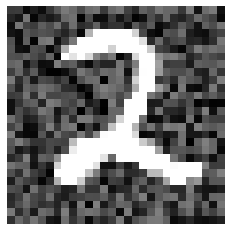

In [25]:
plt.imshow(add_noise(feature[1]).view(28 , 28).cpu(), cmap='gray') # view seperti reshape
plt.axis('off');

## Training Preparation ~> MCOC

In [26]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/dae") # denoising auto encoder

## Training

### Input(Feature) aslinya ditambah noise, targetnya tetap bersih

In [27]:
# training loop
# menggunakan snippets sesuai dengan studi kasus. yaitu dikasus ini tidak menggunakan accuracy

from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device) # melakukan flattening pada feature
        
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3369 | Test_cost  = 0.2659 | 




Epoch     2
Train_cost  = 0.1858 | Test_cost  = 0.1756 | 




Epoch     3
Train_cost  = 0.1614 | Test_cost  = 0.1559 | 




Epoch     4
Train_cost  = 0.1491 | Test_cost  = 0.1449 | 




Epoch     5
Train_cost  = 0.1406 | Test_cost  = 0.1399 | 




Epoch     6
Train_cost  = 0.1332 | Test_cost  = 0.1345 | 




Epoch     7
Train_cost  = 0.1278 | Test_cost  = 0.1293 | 




Epoch     8
Train_cost  = 0.1226 | Test_cost  = 0.1248 | 




Epoch     9
Train_cost  = 0.1193 | Test_cost  = 0.1233 | 




Epoch    10
Train_cost  = 0.1164 | Test_cost  = 0.1217 | 




Epoch    11
Train_cost  = 0.1132 | Test_cost  = 0.1196 | 




Epoch    12
Train_cost  = 0.1107 | Test_cost  = 0.1171 | 




Epoch    13
Train_cost  = 0.1089 | Test_cost  = 0.1151 | 




Epoch    14
Train_cost  = 0.1069 | Test_cost  = 0.1143 | 




Epoch    15
Train_cost  = 0.1055 | Test_cost  = 0.1127 | 




Epoch    16
Train_cost  = 0.1029 | Test_cost  = 0.1130 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1127




Epoch    17
Train_cost  = 0.1021 | Test_cost  = 0.1117 | 




Epoch    18
Train_cost  = 0.1007 | Test_cost  = 0.1104 | 




Epoch    19
Train_cost  = 0.1000 | Test_cost  = 0.1109 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1104




Epoch    20
Train_cost  = 0.0992 | Test_cost  = 0.1097 | 


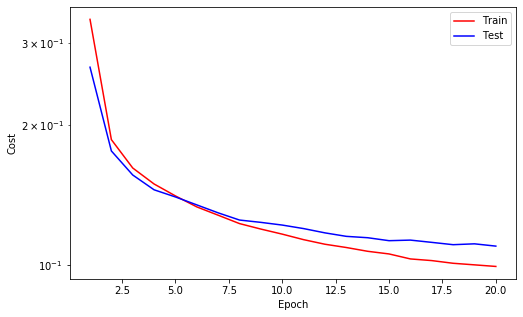



Epoch    21
Train_cost  = 0.0980 | Test_cost  = 0.1085 | 




Epoch    22
Train_cost  = 0.0965 | Test_cost  = 0.1079 | 




Epoch    23
Train_cost  = 0.0951 | Test_cost  = 0.1078 | 




Epoch    24
Train_cost  = 0.0943 | Test_cost  = 0.1067 | 




Epoch    25
Train_cost  = 0.0939 | Test_cost  = 0.1070 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1067




Epoch    26
Train_cost  = 0.0933 | Test_cost  = 0.1066 | 




Epoch    27
Train_cost  = 0.0929 | Test_cost  = 0.1073 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1066




Epoch    28
Train_cost  = 0.0921 | Test_cost  = 0.1068 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1066




Epoch    29
Train_cost  = 0.0910 | Test_cost  = 0.1067 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1066




Epoch    30
Train_cost  = 0.0910 | Test_cost  = 0.1059 | 




Epoch    31
Train_cost  = 0.0905 | Test_cost  = 0.1057 | 




Epoch    32
Train_cost  = 0.0901 | Test_cost  = 0.1051 | 




Epoch    33
Train_cost  = 0.0898 | Test_cost  = 0.1064 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1051




Epoch    34
Train_cost  = 0.0891 | Test_cost  = 0.1042 | 




Epoch    35
Train_cost  = 0.0888 | Test_cost  = 0.1049 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1042




Epoch    36
Train_cost  = 0.0879 | Test_cost  = 0.1051 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1042




Epoch    37
Train_cost  = 0.0869 | Test_cost  = 0.1040 | 




Epoch    38
Train_cost  = 0.0867 | Test_cost  = 0.1042 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1040




Epoch    39
Train_cost  = 0.0866 | Test_cost  = 0.1041 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1040




Epoch    40
Train_cost  = 0.0865 | Test_cost  = 0.1033 | 


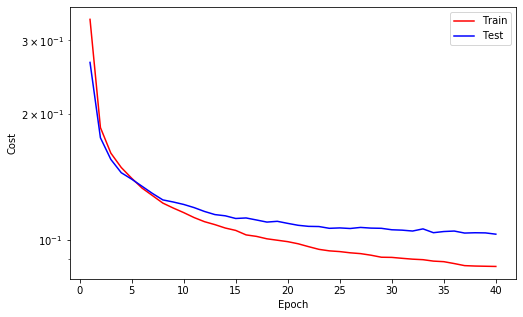



Epoch    41
Train_cost  = 0.0855 | Test_cost  = 0.1031 | 




Epoch    42
Train_cost  = 0.0854 | Test_cost  = 0.1048 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1031




Epoch    43
Train_cost  = 0.0855 | Test_cost  = 0.1043 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1031




Epoch    44
Train_cost  = 0.0852 | Test_cost  = 0.1026 | 




Epoch    45
Train_cost  = 0.0845 | Test_cost  = 0.1036 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1026




Epoch    46
Train_cost  = 0.0844 | Test_cost  = 0.1033 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1026




Epoch    47
Train_cost  = 0.0845 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1026




Epoch    48
Train_cost  = 0.0842 | Test_cost  = 0.1030 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1026




Epoch    49
Train_cost  = 0.0836 | Test_cost  = 0.1036 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1026
==> Execute Early Stopping at epoch: 49 | Best test_cost: 0.1026
==> Best model is saved at model/dae


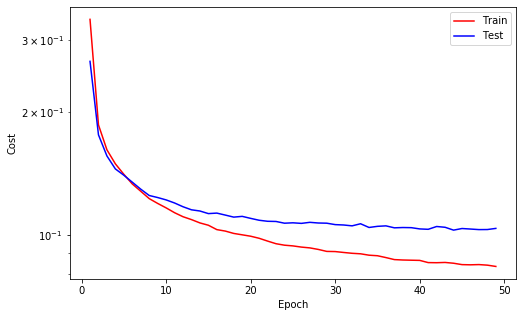

In [28]:
# training 

while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Evaluate / Visualize

In [34]:
feature, target = next(iter(testloader))
feature = add_noise(feature).view(-1, 784).to(device)

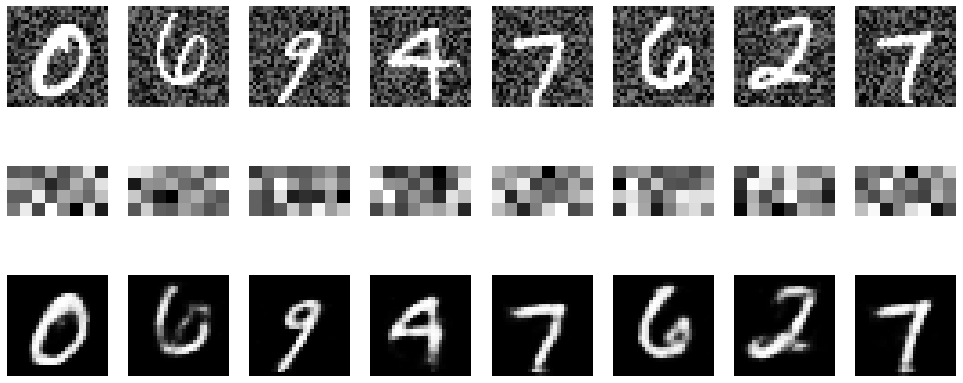

In [35]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature) # encode akan menghasilkan sebuah latent space yang isi bisa berupa angka
    dec = model.decode(enc) # decode di sini akan menghasilkan sebuah gambar yang mirip dengan feature semulanya
    
fig, ax = plt.subplots(3, 8, figsize=(17,7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28,28).cpu(), cmap="gray")
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4,8).cpu(), cmap="gray")
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28,28).cpu(), cmap="gray")
    ax[2, i].axis('off')